In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/iago/jupyter-cuda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/iago/jupyter-cuda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/iago/jupyter-cuda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/iago/jupyter-cuda/lib/python3.6/site-packages/t

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [7]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [20]:
# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


print (trainX.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print (trainX.shape)

(88, 7)
(88, 1, 7)


In [18]:
print (trainX, trainY)

[[[0.01544401 0.02702703 0.05405405 0.04826255 0.03281853 0.05984557
   0.08494207]]

 [[0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
   0.08494207]]

 [[0.05405405 0.04826255 0.03281853 0.05984557 0.08494207 0.08494207
   0.06177607]]

 [[0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
   0.02895753]]

 [[0.03281853 0.05984557 0.08494207 0.08494207 0.06177607 0.02895753
   0.        ]]

 [[0.05984557 0.08494207 0.08494207 0.06177607 0.02895753 0.
   0.02702703]]

 [[0.08494207 0.08494207 0.06177607 0.02895753 0.         0.02702703
   0.02123553]]

 [[0.08494207 0.06177607 0.02895753 0.         0.02702703 0.02123553
   0.04247104]]

 [[0.06177607 0.02895753 0.         0.02702703 0.02123553 0.04247104
   0.07142857]]

 [[0.02895753 0.         0.02702703 0.02123553 0.04247104 0.07142857
   0.05984557]]

 [[0.         0.02702703 0.02123553 0.04247104 0.07142857 0.05984557
   0.04054055]]

 [[0.02702703 0.02123553 0.04247104 0.07142857 0.05984557 0.04

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0403
Epoch 2/100
 - 0s - loss: 0.0115
Epoch 3/100
 - 0s - loss: 0.0079
Epoch 4/100
 - 0s - loss: 0.0071
Epoch 5/100
 - 0s - loss: 0.0064
Epoch 6/100
 - 0s - loss: 0.0059
Epoch 7/100
 - 0s - loss: 0.0055
Epoch 8/100
 - 0s - loss: 0.0053
Epoch 9/100
 - 0s - loss: 0.0050
Epoch 10/100
 - 0s - loss: 0.0048
Epoch 11/100
 - 0s - loss: 0.0048
Epoch 12/100
 - 0s - loss: 0.0045
Epoch 13/100
 - 0s - loss: 0.0044
Epoch 14/100
 - 0s - loss: 0.0044
Epoch 15/100
 - 0s - loss: 0.0040
Epoch 16/100
 - 0s - loss: 0.0041
Epoch 17/100
 - 0s - loss: 0.0042
Epoch 18/100
 - 0s - loss: 0.0041
Epoch 19/100
 - 0s - loss: 0.0040
Epoch 20/100
 - 0s - loss: 0.0040
Epoch 21/100
 - 0s - loss: 0.0038
Epoch 22/100
 - 0s - loss: 0.0039
Epoch 23/100
 - 0s - loss: 0.0038
Epoch 24/100
 - 0s - loss: 0.0035
Epoch 25/100
 - 0s - loss: 0.0034
Epoch 26/100
 - 0s - loss: 0.0036
Epoch 27/100
 - 0s - loss: 0.0034
Epoch 28/100
 - 0s - loss: 0.0035
Epoch 29/100
 - 0s - loss: 0.0031
Epoch 30/100
 - 0s - lo

Train Score: 21.60 RMSE
Test Score: 59.07 RMSE


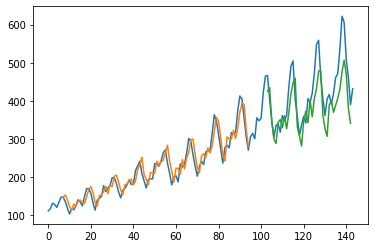

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()